<a href="https://colab.research.google.com/github/arnav77/Cancer_detection/blob/master/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[A] Building a Classifier to predict the outcome of a new patient with accuracy and minimum false-negatives.

In [0]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [0]:
#Reading Data
from google.colab import files
#uploaded = files.upload()
df = pd.read_excel('BreastCancer_Prognostic_v1.xlsx')

In [0]:
df.head(20)

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.014210,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.034490,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
5,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,0.1995,0.07164,0.3877,0.7402,2.999,30.85,0.007775,0.029870,0.04561,0.013570,0.01774,0.005114,15.51,20.37,107.30,733.2,0.1706,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0
6,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.12370,0.12130,0.08910,0.1727,0.05767,0.5285,0.8434,3.592,61.21,0.003703,0.023540,0.02222,0.013320,0.01378,0.003926,23.39,25.45,152.60,1593.0,0.1144,0.3371,0.2990,0.19220,0.2726,0.09581,1.5,?
7,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,4.0,10
8,844981,N,119,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,2.0,1
9,845010,N,76,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,6.0,20


In [0]:
df.shape

(198, 35)

In [0]:
df.isna().sum()

ID                           0
Outcome                      0
Time                         0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_std_dev               0
texture_std_dev              0
perimeter_std_dev            0
area_std_dev                 0
smoothness_std_dev           0
compactness_std_dev          0
concavity_std_dev            0
concave_points_std_dev       0
symmetry_std_dev             0
fractal_dimension_std_dev    0
Worst_radius                 0
Worst_texture                0
Worst_perimeter              0
Worst_area                   0
Worst_smoothness             0
Worst_compactness            0
Worst_concavity              0
Worst_concave_points         0
Worst_symmetry               0
Worst_fr

In [0]:
df.Outcome.value_counts()

N    151
R     47
Name: Outcome, dtype: int64

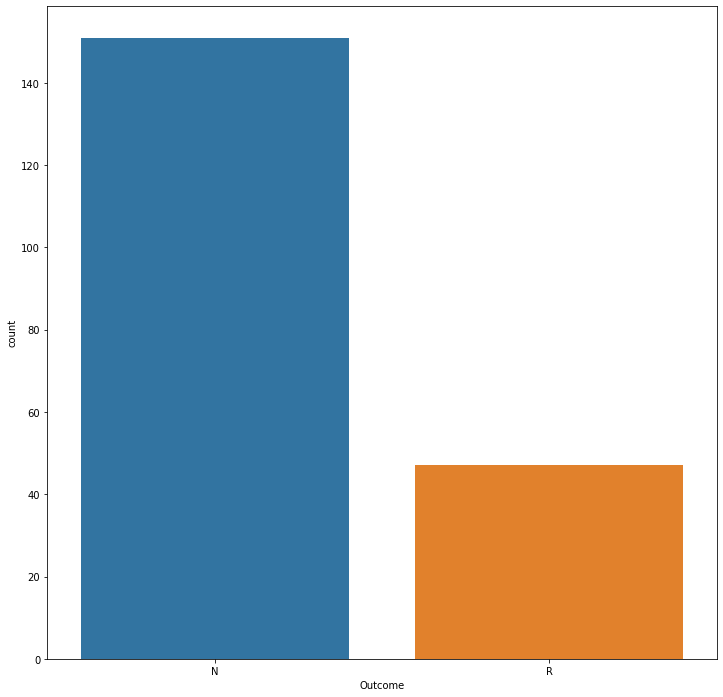

In [0]:
sns.countplot(df.Outcome, label='count')

In [0]:
df.dtypes

ID                             int64
Outcome                       object
Time                           int64
radius_mean                  float64
texture_mean                 float64
perimeter_mean               float64
area_mean                    float64
smoothness_mean              float64
compactness_mean             float64
concavity_mean               float64
concave_points_mean          float64
symmetry_mean                float64
fractal_dimension_mean       float64
radius_std_dev               float64
texture_std_dev              float64
perimeter_std_dev            float64
area_std_dev                 float64
smoothness_std_dev           float64
compactness_std_dev          float64
concavity_std_dev            float64
concave_points_std_dev       float64
symmetry_std_dev             float64
fractal_dimension_std_dev    float64
Worst_radius                 float64
Worst_texture                float64
Worst_perimeter              float64
Worst_area                   float64
W

In [0]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]= labelencoder_Y.fit_transform(df.iloc[:,1].values)
print(labelencoder_Y.fit_transform(df.iloc[:,1].values))

[0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [0]:
df.head()

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [0]:
#pairplot
#sns.pairplot(df.iloc[:,:], hue='Outcome')

In [0]:
#Observing Correlations
df.iloc[:,1:].corr()

,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size
Outcome,1.000000,-0.351326,0.174124,-0.064295,0.176486,0.189893,0.020778,0.000798,0.054893,0.118224,-0.099777,-0.112352,0.132512,-0.076212,0.141633,0.151826,-0.052213,-0.009537,-0.060379,-0.065570,-0.044325,-0.042751,0.233225,-0.051134,0.231998,0.235310,0.038520,-0.020067,0.017621,0.074345,-0.074731,-0.055170,0.177273
Time,-0.351326,1.000000,-0.344722,-0.264671,-0.346080,-0.344031,0.164793,0.010000,-0.139475,-0.171841,0.177311,0.269992,-0.214543,-0.230477,-0.231621,-0.244159,0.019775,-0.002386,-0.108648,-0.140754,0.011156,0.099203,-0.265115,-0.171125,-0.280596,-0.253930,0.212769,0.120516,0.009546,-0.026541,0.247678,0.288715,-0.133355
radius_mean,0.174124,-0.344722,1.000000,0.143456,0.995933,0.992855,-0.158239,0.159017,0.469518,0.664010,-0.051610,-0.416674,0.602035,0.079693,0.588927,0.710586,-0.036419,0.023647,0.154254,0.224771,0.019146,-0.072618,0.924183,-0.039439,0.915053,0.891489,-0.372894,-0.150712,0.038952,0.357869,-0.232142,-0.414340,0.172102
texture_mean,-0.064295,-0.264671,0.143456,1.000000,0.142033,0.140440,-0.192262,-0.039803,0.037165,0.006687,-0.165166,-0.145572,0.059168,0.382533,0.075025,0.068517,0.027119,0.063988,0.071920,0.010470,-0.094843,-0.020673,0.123028,0.862050,0.123674,0.117467,-0.113308,-0.006467,0.013635,-0.069921,-0.186850,-0.085847,0.027073
perimeter_mean,0.176486,-0.346080,0.995933,0.142033,1.000000,0.990699,-0.102912,0.236721,0.533194,0.712766,-0.006512,-0.353560,0.612708,0.092256,0.609964,0.718581,-0.011788,0.080725,0.202027,0.254473,0.038613,-0.019514,0.921552,-0.039728,0.923659,0.889344,-0.331667,-0.092041,0.096790,0.410000,-0.206949,-0.364022,0.166489
area_mean,0.189893,-0.344031,0.992855,0.140440,0.990699,1.000000,-0.141470,0.163176,0.475862,0.667530,-0.060785,-0.397733,0.623019,0.084288,0.609887,0.740830,-0.032969,0.020395,0.144443,0.213582,0.009121,-0.071906,0.932381,-0.032122,0.925335,0.914166,-0.345111,-0.141358,0.046641,0.365026,-0.234294,-0.395026,0.174491
smoothness_mean,0.020778,0.164793,-0.158239,-0.192262,-0.102912,-0.141470,1.000000,0.666559,0.623867,0.545734,0.540761,0.744890,0.094728,0.153848,0.099518,0.037955,0.344678,0.372393,0.375011,0.223510,0.223723,0.486112,-0.115092,-0.106172,-0.064664,-0.106691,0.745400,0.447849,0.499438,0.531015,0.308964,0.535751,-0.084376
compactness_mean,0.000798,0.010000,0.159017,-0.039803,0.236721,0.163176,0.666559,1.000000,0.836015,0.716438,0.666822,0.735474,0.251568,0.082994,0.318684,0.233326,0.212552,0.714122,0.599020,0.384747,0.350009,0.648248,0.183277,-0.047665,0.276994,0.168275,0.452067,0.764824,0.743333,0.761044,0.429953,0.611315,-0.060199
concavity_mean,0.054893,-0.139475,0.469518,0.037165,0.533194,0.475862,0.623867,0.836015,1.000000,0.909990,0.524861,0.449928,0.427031,0.181984,0.468426,0.449059,0.297014,0.564196,0.676804,0.434928,0.304383,0.504069,0.437961,-0.032081,0.514336,0.421021,0.319247,0.483300,0.702673,0.767571,0.212976,0.302868,-0.010244
concave_points_mean,0.118224,-0.171841,0.664010,0.006687,0.712766,0.667530,0.545734,0.716438,0.909990,1.000000,0.429968,0.268210,0.555034,0.179486,0.580562,0.586508,0.177402,0.376339,0.463710,0.426638,0.238520,0.350050,0.630309,-0.094163,0.682749,0.604029,0.174917,0.286599,0.471429,0.764803,0.089804,0.101327,0.050040


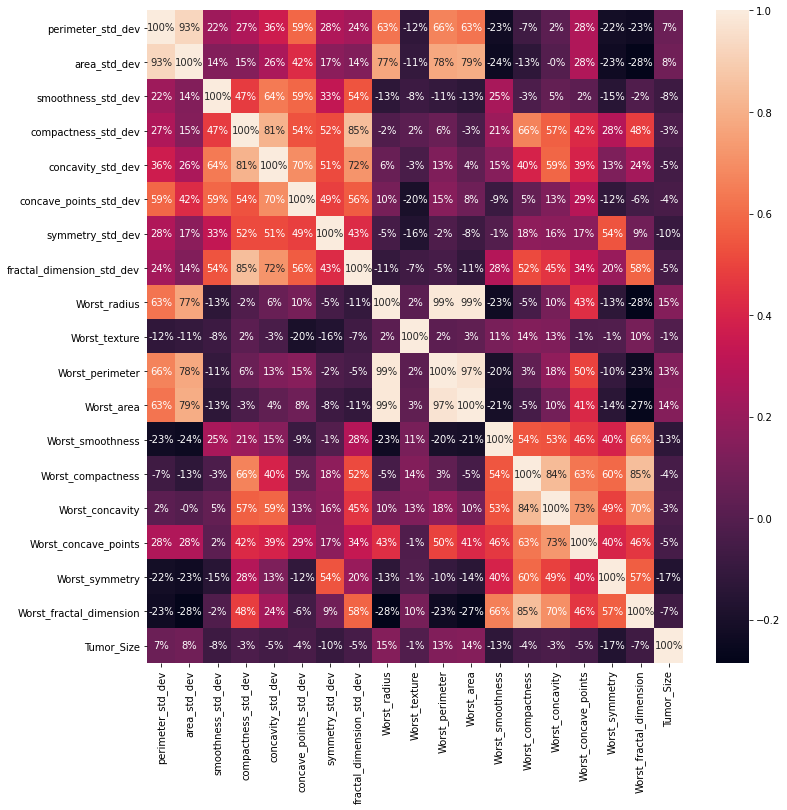

In [0]:
plt.rcParams["figure.figsize"] = (12,12)
sns.heatmap(df.iloc[:,15:].corr(), annot=True, fmt='.0%')

In [0]:
#Input for model
X = df.iloc[:,2:34]

In [0]:
X.head()

,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size
0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0
1,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0
2,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5
3,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0
4,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5


In [0]:
Y = df.iloc[:,1]

In [0]:
Y.head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      1
      ..
193    0
194    0
195    0
196    1
197    0
Name: Outcome, Length: 198, dtype: int64>

In [0]:
#Test-Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15,random_state=0)

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Comparing Models
def models(X_train,Y_train):
  
  #Using Logistic Regression 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC linear
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [0]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.875
[1]K Nearest Neighbor Training Accuracy: 0.8392857142857143
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9047619047619048
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8511904761904762
[4]Gaussian Naive Bayes Training Accuracy: 0.7023809523809523
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9821428571428571


In [0]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print('-----------------------------------')

[[21  0]
 [ 7  2]]
Model[0] Testing Accuracy = "0.7666666666666667!"
-----------------------------------
[[19  2]
 [ 7  2]]
Model[1] Testing Accuracy = "0.7!"
-----------------------------------
[[19  2]
 [ 7  2]]
Model[2] Testing Accuracy = "0.7!"
-----------------------------------
[[20  1]
 [ 8  1]]
Model[3] Testing Accuracy = "0.7!"
-----------------------------------
[[16  5]
 [ 4  5]]
Model[4] Testing Accuracy = "0.7!"
-----------------------------------
[[15  6]
 [ 7  2]]
Model[5] Testing Accuracy = "0.5666666666666667!"
-----------------------------------
[[19  2]
 [ 8  1]]
Model[6] Testing Accuracy = "0.6666666666666666!"
-----------------------------------


In [0]:
pred = model[4].predict(X_test)
print(pred)

[0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0]


In [0]:
#Y_test

In [0]:
#print(np.array(Y_test))

#the results are not in order because of the test-train-split function

BY OBSERVING THE ABOVE VALUES, MODEL[4], GAUSSIAN NAIVE BIAS GIVES A GOOD BALANCE OF ACCURACY AND MINIMISES FALSE-NEGATIVES.

Since the size of the data is small, the training accuracy is very high because the model overfits the training data. The number of false-negatives increase if the size of the test-set is increased. 

In [0]:
#def predictor(radius_mean,........,tumor_size):
  #
  #
  #
  #
  #

[B] Building a Regression Model to predict the time for patients whose outcome is R.

In [0]:
#Sub-dataframe with only 'R' outcome
df1 = df[df.Outcome==1]

In [0]:
df1.head(50)

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.017560,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
5,843786,1,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,0.1995,0.07164,0.3877,0.7402,2.999,30.85,0.007775,0.029870,0.04561,0.013570,0.017740,0.005114,15.51,20.37,107.3,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0
7,844582,1,77,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.014860,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10
13,847990,1,36,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.042400,0.04741,0.010900,0.018570,0.005466,17.46,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,6.0,6
15,848620,1,10,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,0.5692,1.0730,3.854,54.18,0.007026,0.025010,0.03188,0.012970,0.016890,0.004142,20.96,31.48,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,3.0,1
17,851509,1,10,21.16,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,0.05278,0.6917,1.1270,4.303,93.99,0.004728,0.012590,0.01715,0.010380,0.010830,0.001987,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526,4.0,1
34,855625,1,9,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,0.9811,1.6660,8.830,104.90,0.006548,0.100600,0.09723,0.026380,0.053330,0.007646,24.09,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.10380,2.3,0
37,857010,1,8,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.10090,0.1907,0.06049,0.6289,0.6633,4.293,71.56,0.006294,0.039940,0.05554,0.016950,0.024280,0.003535,22.82,21.32,150.6,1567.0,0.1679,0.5090,0.7345,0.2378,0.3799,0.09185,1.8,0
39,857438,1,48,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,0.3105,0.8339,2.097,29.91,0.004675,0.010300,0.01603,0.009222,0.010950,0.001629,18.10,31.69,117.7,1030.0,0.1389,0.2057,0.2712,0.1530,0.2675,0.07873,2.5,0
40,857637,1,11,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,0.7275,1.1930,4.837,102.50,0.006458,0.023060,0.02945,0.015380,0.018520,0.002608,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294,3.2,13


In [0]:
x = df1.iloc[:,3:34]

In [0]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size
4,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5
5,12.75,15.29,84.60,502.7,0.1189,0.1569,0.16640,0.07666,0.1995,0.07164,0.3877,0.7402,2.999,30.85,0.007775,0.02987,0.04561,0.01357,0.01774,0.005114,15.51,20.37,107.3,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5
7,13.71,20.83,90.20,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0
13,14.54,27.54,96.73,658.8,0.1139,0.1595,0.16390,0.07364,0.2303,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.04240,0.04741,0.01090,0.01857,0.005466,17.46,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,6.0
15,16.13,20.68,108.10,798.8,0.1170,0.2022,0.17220,0.10280,0.2164,0.07356,0.5692,1.0730,3.854,54.18,0.007026,0.02501,0.03188,0.01297,0.01689,0.004142,20.96,31.48,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,3.0


In [0]:
y = df1.iloc[:,2]

In [0]:
y.head()

4     27
5     77
7     77
13    36
15    10
Name: Time, dtype: int64

In [0]:
#Test-Train Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

-0.4386335985712977

In [0]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([-0.4386336 , -1.10582687,  0.13440712, -2.08678534, -1.10019996])

In [0]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [0]:
#Model Selection
def model_selection(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

model_selection(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5455.807846396429, tolerance: 2.166257142857143
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4776.636699297111, tolerance: 1.7894285714285714
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6023.78196672296, tolerance: 2.2790976190476187
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6011.418747

,model,best_score,best_params
0,linear_regression,-0.919408,{'normalize': True}
1,lasso,-0.311495,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,-2.536422,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


NONE OF THE ABOVE MODELS SHOW A GOOD RESULT AND HAVE A VERY BAD FIT. THIS IS MAJORILY DUE TO THE LIMITED AMOUNT OF DATA AVAILABLE. NONETHELESS 'LASSO' SEEMS TO BE A GOOD SELECTION FOR A REGRESSION MODEL.